# **Visualization of MFCC pre-processing method**

1.   Amplitude Scale Audio
2.   Framing Windowing
3.   Fourier Transform
4.   Mel Filterbank
5.   Apply Log Function
6.   Discrete Cosine Transform


In [295]:
from time import sleep

import pickle
import numpy as np
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt

from matplotlib import cm # for color map
from python_speech_features import logfbank, fbank
from scipy.fftpack import dct


# Library for performing speech recognition
# Python 2.6, 2.7, or 3.3+ (required)
# PyAudio 0.2.11+ (required only if you need to use microphone input, Microphone)
# More : https://github.com/Uberi/speech_recognition
import speech_recognition as sr 
import scipy.signal as signal


Checking librosa version and speech_recognition version

In [296]:
print("librosa version : ",librosa.__version__)
print("speech_recognition version : ", sr.__version__)
save_path = "./test_train_data/"

librosa version :  0.7.2
speech_recognition version :  3.8.1


## Recording Speech

 Creates a new ``Recognizer`` instance, which represents a collection of speech recognition functionality.

In [3]:
r = sr.Recognizer() 

print("음성 데이터 녹음")
file_name = str(input("이름을 입력하세요 : "))


음성 데이터 녹음
이름을 입력하세요 : kimsubin


Print a list of connected microphones

In [4]:
list_0 =sr.Microphone.list_microphone_names()
for i in range(0, len(list_0)-1):
    print(list_0[i])

HDA Intel PCH: ALC892 Analog (hw:0,0)
HDA Intel PCH: ALC892 Digital (hw:0,1)
HDA Intel PCH: ALC892 Alt Analog (hw:0,2)
HDA NVidia: HDMI 0 (hw:1,3)
HDA NVidia: HDMI 1 (hw:1,7)
HDA NVidia: HDMI 2 (hw:1,8)
HDA NVidia: HDMI 3 (hw:1,9)
sysdefault
front
surround21
surround40
surround41
surround50
surround51
surround71
iec958
spdif
pulse
dmix


Speech recording and save as WAV file

In [5]:
# Higher sample_rate result in better audio quality, slower recognition
# Higher chunk_size help avoid triggering on rapidly changing ambient noise,
#  but also makes detection less sensitive
microphone = sr.Microphone(device_index=7, sample_rate=None, chunk_size=1024)

In [71]:
 with microphone as source:
    print("15초 동안 녹음을 시작합니다.")
    print("녹음이 시작되면 다음 문장을 읽어주세요.\n")
        
    print("죽는 날까지 하늘을 우러러\n한 점 부끄러움이 없기를 \
        \n잎새에 이는 바람에도 \n나는 괴로워했다.\n별을 노래하는 마음으로 \
        \n모든 죽어가는 것을 사랑해야지\n그리고 나한테 주어진 길을\n걸어가야겠다")
        
    sleep(4)
        
        
    print("*****   녹음 시작   *****\n")
        
    # This method reads the first second of the file stream 
    # and calibrates the recognizer to the noise level of the audio.
    # adjust_for_ambient_noise는 첫 번째 초에 해당하는 오디오를 듣고 노이즈를 교정하는 메소드
    r.adjust_for_ambient_noise(source, duration=1)
        
    '''
    !! adjust_for_ambient_noise를 사용하면 첫 번째 초를 잃게 됨. -> sleep(4)인 이유
    !! 오디오의 1초는 노이즈 레벨을 판단하는 요소 : duration 으로 조정 가능, 가능한 0.5초 이상인게 좋다.
    !! durations longer than the default of one second generate better results.
    !! durations의 최솟값은 마이크의 주변 환경에 따라 다름.
    '''
        
    # This method takes an audio source as its first argument and
    # records input from the source until silence is detected.
    # microphone의 입력을 감지, 무음이 감지될 때까지 소스의 입력을 기록한다. -> 종료되는 오류의 원인일 가능성    
    audio = r.listen(source , phrase_time_limit=15)
        
    # audio는 AudioData(frame_data, source.SAMPLE_RATE, source.SAMPLE_WIDTH)
        
        
    print(" 녹음 완료. ")
        
        
    # Audio file 저장
    save_path = "./test_train_data/"
        
    if not os.path.exists(save_path + file_name):
        os.makedirs(save_path + file_name)
        result_name = file_name +"_"+str(0)
    else :
        files = os.listdir(save_path + file_name)
        result_name = file_name +"_"+str(len(files))
        
    with open(save_path + file_name + "/" + result_name+".wav", "wb") as f:
        f.write(audio.get_wav_data()) # AudioData to .wav
        print("''"+result_name + "' File Write Finish !")
            
    print(" Saved File Name : "+result_name)
        
            

15초 동안 녹음을 시작합니다.
녹음이 시작되면 다음 문장을 읽어주세요.

죽는 날까지 하늘을 우러러
한 점 부끄러움이 없기를        
잎새에 이는 바람에도 
나는 괴로워했다.
별을 노래하는 마음으로        
모든 죽어가는 것을 사랑해야지
그리고 나한테 주어진 길을
걸어가야겠다
*****   녹음 시작   *****

 녹음 완료. 
''kimsubin_6' File Write Finish !
 Saved File Name : kimsubin_6


#### Select WAV file

In [297]:
user_list = os.listdir(save_path)
user_list.sort()

print("User List :")
for i, item in zip(range(len(user_list)), user_list):
    print('[{:d}] '.format(i)+item)

selUserNum = int(input("\n유저 번호를 선택하세요 : "))

file_list = os.listdir(save_path + str(user_list[selUserNum]+"/"))
file_list.sort()

print("\nFile List : ")
for i, item in zip(range(len(file_list)), file_list):
    print('[{:d}] '.format(i)+item)
    
selFileNum = int(input("\n파일 번호를 선택하세요 : "))

final_file_name = save_path + str(user_list[selUserNum]) +"/"+ str(file_list[selFileNum])

User List :
[0] juheon
[1] kimsubin

유저 번호를 선택하세요 : 1

File List : 
[0] kimsubin_0.wav
[1] kimsubin_1.wav
[2] kimsubin_2.wav
[3] kimsubin_3.wav
[4] kimsubin_4.wav
[5] kimsubin_5.wav
[6] kimsubin_6.wav

파일 번호를 선택하세요 : 6


Loads and decodes the audio as a time series 1D array

-  Sample Rate  
 1초 당 들리는 Sample의 갯수를 단위로 나타낸 것이다.

In [298]:
'''
 y: loads and decodes the audio as a time series (one-dimensional NumPy floating point array)
 sr : the sampling rate of y, that is, the number of samples per second of audio
         
 mono=True : Convert stereo type to mono type (convert signal to mono)
 duration : only load up to this much audio (in seconds)
'''      
y, sr = librosa.load(final_file_name, sr=16000, mono=True, duration=15)
print(len(y), sr)

hop_length = 512
n_mels = 128
n_fft = 512


240000 16000


## Visualization Amplitude Scale Audio Signal


Range of Amplitude = -1.10864 ~ 1.15171


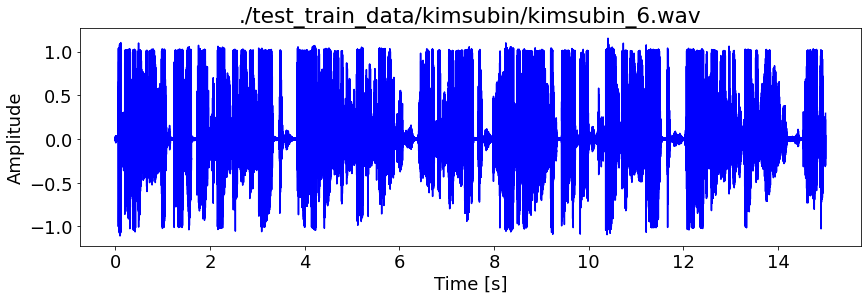

In [299]:
# 0에서 len(y)/sr까지, len(y)개의 요소를 갖는 array
time = np.linspace(0, len(y)/sr, len(y)) # time axis


print('\nRange of Amplitude = {:g} ~ {:g}'.format(np.min(y), np.max(y)))
plt.plot(time, y, color = 'b', label='speech waveform')
plt.xlabel("Time [s]")# x 축
plt.ylabel("Amplitude")# y 축 (진폭)
plt.title(final_file_name) 
plt.rcParams["figure.figsize"] = (14,4)
plt.show()

Graph using Librosa library


Range of Amplitude = -1.10864 ~ 1.15171


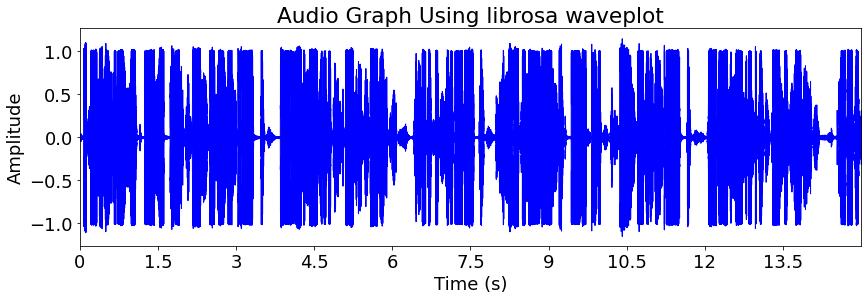

In [300]:
plt.figure()
plt.rcParams["figure.figsize"] = (14,4)
plt.title('Audio Graph Using librosa waveplot')
plt.ylabel("Amplitude")
print('\nRange of Amplitude = {:g} ~ {:g}'.format(np.min(y), np.max(y)))

'''
 y:np.ndarray [shape=(n,) or (2,n)]
 sr:sampling rate of y
 max_points:Maximum number of time-points to plot
 x_axis:str or None, ‘time’, 's'(as seconds), 'ms', etc. 
 max_sr:Maximum sampling rate for the visualization(max_sr > 0)
'''
librosa.display.waveplot(y=y, sr=sr, max_points=50000.0, x_axis='s',offset=0.0, max_sr=1000,color = 'b')


## Framing Windowing and Fourier Transform

시간 축의 데이터를 주파수 축의 데이터로 변환하기 위해 사용된다.

*   **STFT (Short-Time Fourier Transform)**

STFT란 시간이 지남에 따라 변화하는 신호의 사인파 주파수와 위상 성분을 결정하는 데 사용되는 푸리에 관련 변환이다.  
STFT는 시간에 따라 변화하는 긴 신호를 짧은 시간 단위로 분할한 다음에 푸리에 변환을 적용하기에  
결과적으로 각 시간 구간마다 어떤 주파수들이 존재하는지 알 수 있다.

In [301]:
# librosa.stft는 window function도 지원함
'''
    y: real-valued input signal
    n_fft : length of the windowed signal after padding with zeros.
        n_fft=2048 is adapted for music  signals.
        n_fft=512 is adapted for speech processing.
        
    hop_length : The overlapping size of the windows is called hop size.
        To achieve the ideal result, 75% or 1/4 is overlapped.
        Defaults to `win_length / 4` (see below).
    win_length : window length, Default is n_fft
    window : window function, 
        Default to a raised cosine window ("hann"), adapted for most applications in audio signal processing.
    center : Defaults to `True`. however, `center` must be set to `False` when analyzing signals with `librosa.stream`.
    pad_mode : Padding function used when center = true
'''


stft = librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hamm',
         center=True, dtype=np.complex64, pad_mode='reflect')
# librosa.stft()는 spectogram을 반환한다.
# spectogram은 복소수로 반환되므로, amplitude_to_db를 사용할 때 np.abs를 적용해야 한다.

-   **stft.shape이 가지는 의미**  


(257, 469)라면, 257개의 주파수빈과 469개의 프레임을 가진다는 의미로, 주파수 빈은 1 + n_fft/2로 계산된다.

In [302]:
print(stft.shape)

(257, 469)


stft가 가지는 intensity의 범위

In [303]:
print(np.min(np.min(stft, axis=1)), np.max(np.max(stft, axis=1)))
print(np.min(np.min(stft, axis=0)), np.max(np.max(stft, axis=0)))

(-95.77863+52.365086j) (95.15016-18.91624j)
(-95.77863+52.365086j) (95.15016-18.91624j)


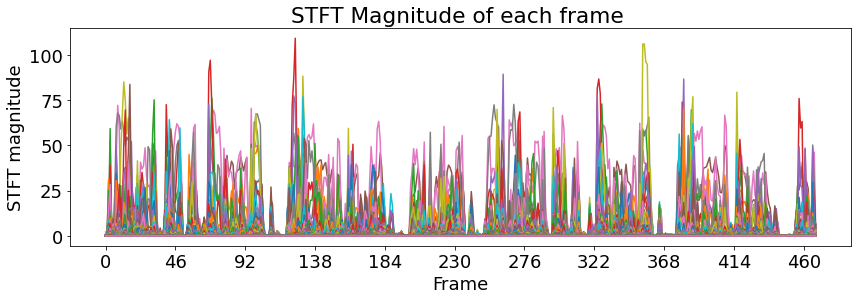

In [304]:
plt.plot(np.abs(stft.T))
plt.title('STFT Magnitude of each frame ')
plt.xticks(np.arange(0, stft.shape[1], step=int(stft.shape[1]//10)), \
           ["{:d}".format(x) for x in np.arange(0, stft.shape[1], step=int(stft.shape[1]//10))], fontsize=18)
plt.xlabel('Frame')
plt.ylabel('STFT magnitude')
plt.show()

 STFT는 프레임 축과 주파수빈 축에 따라 intensity를 갖고 있어, line graph는 의미가 없을 것이라 생각한다.  
따라서 Spectogram으로 intensity를 표현한다.  

log를 취하지 않아, 사람이 인지할 수 없는 낮은 신호값을 가짐을 확인할 수 있다.

/home/subin/.local/lib/python3.6/site-packages/librosa/display.py:725: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


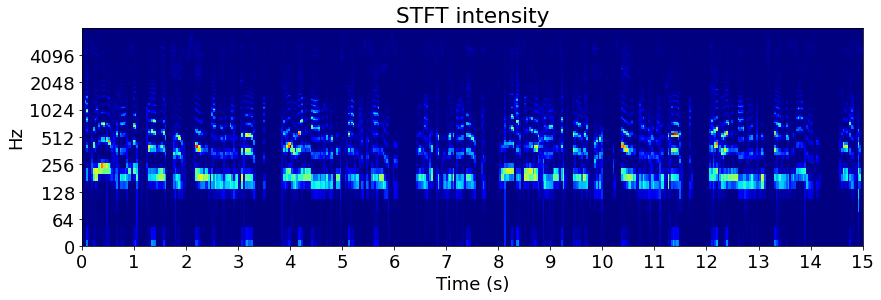

In [305]:
librosa.display.specshow(stft, sr=sr, hop_length=hop_length, x_axis='s', y_axis='log', cmap=cm.jet)
plt.title("STFT intensity")
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

librosa의 stft 함수는 복소수값을 반환하므로, log를 취하기 전에 abs를 씌워야 한다.

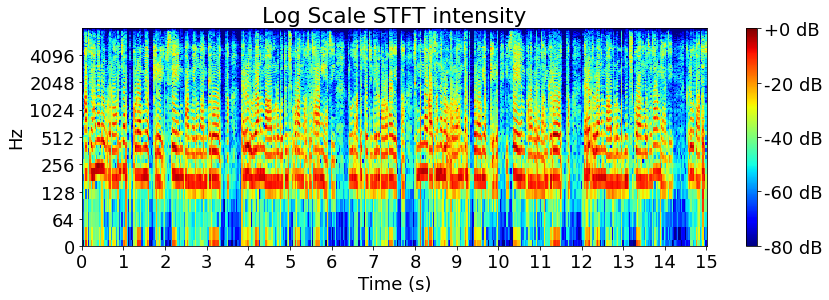

In [306]:

abs_STFT = np.abs(stft)
log_STFT = librosa.amplitude_to_db(abs_STFT, ref=np.max)
librosa.display.specshow(log_STFT, sr=sr, hop_length=hop_length, x_axis='s', y_axis='log', cmap=cm.jet);
plt.colorbar(format='%+2.0f dB');
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.title('Log Scale STFT intensity')
plt.show()

## Mel Filterbank

 Mel-Scale이란 사람의 Non-Linear한 Ear perception of Sound를 고려한 Hz의 변형된 Scale이며,  
 Mel-scale Filterbanks이란 Non-Linear한 구간을 가진 40개의 Triangular Filterbanks이다.  
 Mel Spectrogram의 y축은 Filterbank의 개수와 동일한 Dimension을 갖는다.  
 즉, 40개의 각 Filterbank들이 커버하는 영역의 Hz를 Triangle Filter로 검출하여 요약한 정보이다.


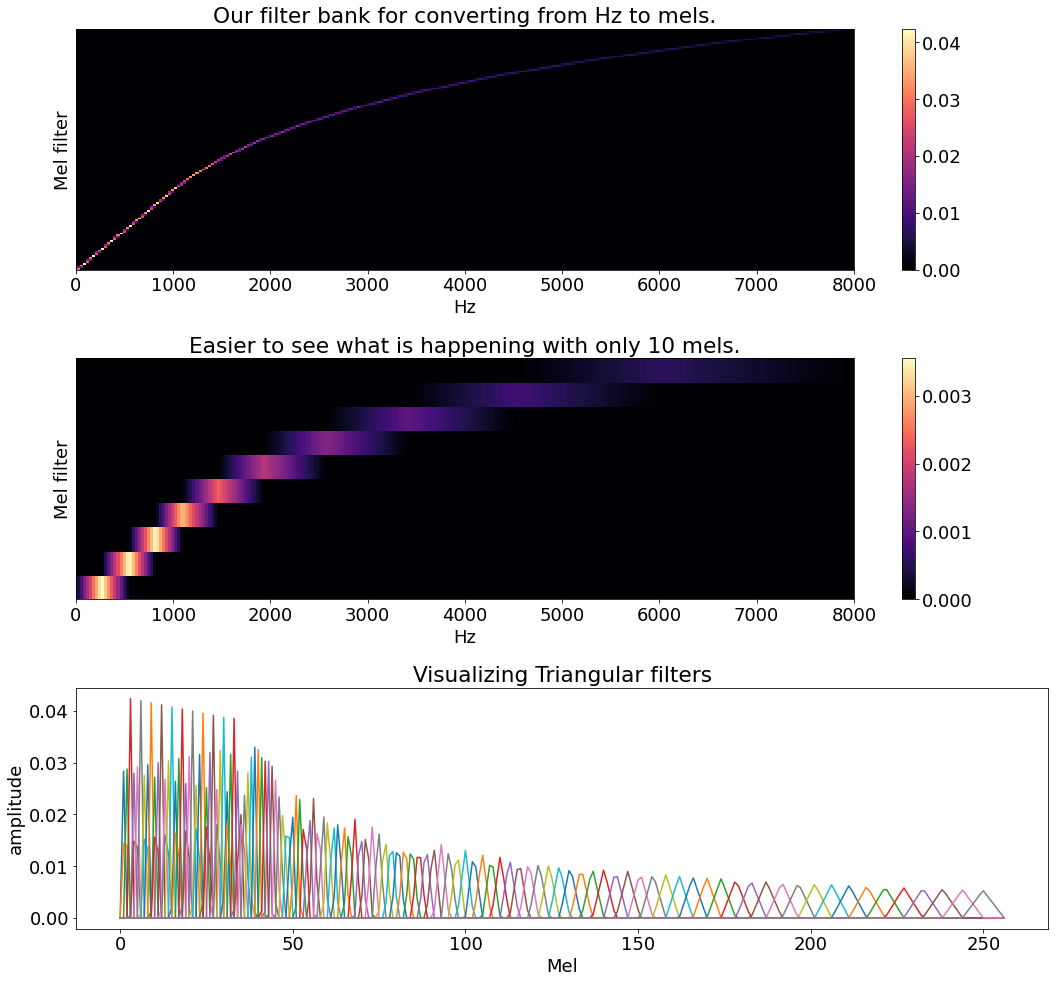

(128, 257) (257, 469)


In [307]:
#librosa.filters.mel return (n_mels ,n_fft/2 +1)
# column은 mel filterbank의 각 주파수에 대한 가중치 값을 갖는다.
# 각 row는 mel을 의미한다.
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
plt.figure(figsize=(15, 14));


plt.subplot(3, 1, 1);
plt.title('Our filter bank for converting from Hz to mels.');
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();

mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)

plt.subplot(3, 1, 2);
plt.title('Easier to see what is happening with only 10 mels.')
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear')
plt.ylabel('Mel filter')
plt.colorbar()

plt.subplot(3, 1, 3)
plt.title('Visualizing Triangular filters');
idxs_to_plot = range(0,n_mels)
for i in idxs_to_plot:
    plt.plot(mel[i]);
# plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.xlabel('Mel')
plt.ylabel('amplitude')

plt.tight_layout()
plt.show()

print(mel.shape, abs_STFT.shape)


-  **Normalize Mel Filter Banks**

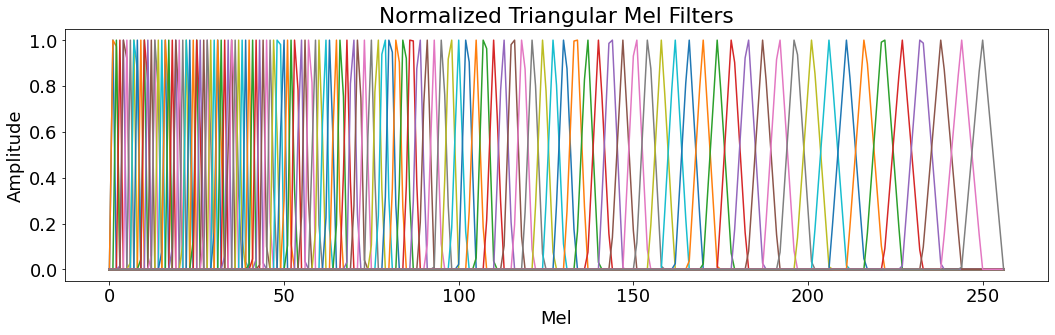

In [308]:
mel /= np.max(mel, axis=-1)[:, None]

plt.figure(figsize=(15, 5));
plt.title('Normalized Triangular Mel Filters');
idxs_to_plot = range(0,n_mels)
for i in idxs_to_plot:
    plt.plot(mel[i]);

    plt.xlabel('Mel')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Apply the Mel Filterbank

In [309]:
mel_S = np.dot(mel, abs_STFT)
print(mel_S.shape)

(128, 469)


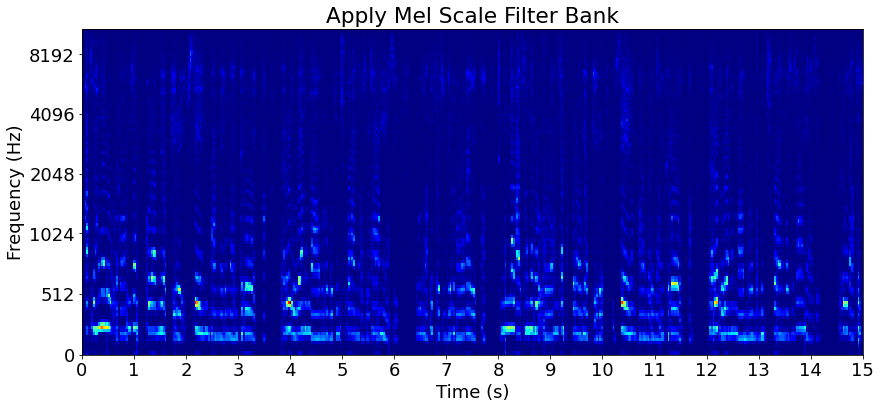

In [310]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(mel_S, sr=sr, hop_length=hop_length, x_axis='s',y_axis='mel', cmap=cm.jet)
# plt.grid('on')
plt.title("Apply Mel Scale Filter Bank")
plt.ylabel('Frequency (Hz)')
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

## Convert to Log Scale 

*   **Value with STFT applied**


**Frequency** : 주파수는 소리의 파장, 보통 1초당 한 점을 통과하는 파동의 수이다. (소리의 음색)  

*목소리의 주파수 대역은 30Hz ~ 3000Hz이다.*  

**Decibel** : Decibel은 소리의 상대적인 크기를 나타내는 단위이다.(소리의 음고)

*- 70dB 이하의 신호는는 매우 낮은 신호로 간주된다.*


-   ``Frame to Time (s)  ``   
``time = frame * hop_length / sr``

(128, 469)
469


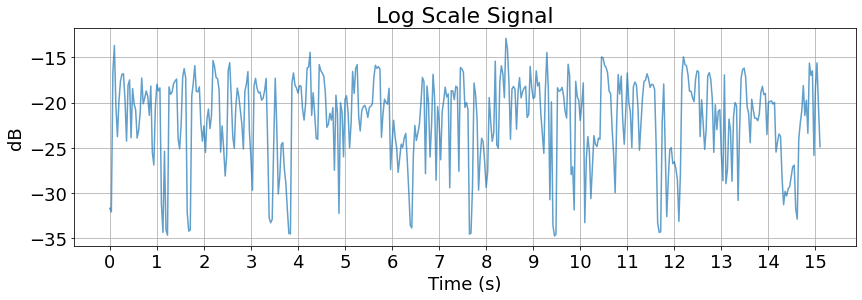

In [311]:
'''
S:(np.ndarray) input amplitude
abs(S)는 ref: 20 * log10(S / ref)로 조정되며, 출력 0은 S==ref인 위치
amin:minimum threshold for S and ref
top_db :threshold the output at top_db below the peak: max(20 * log10(S)) - top_db
'''
using_STFT_dB= librosa.power_to_db(S=np.abs(mel_S), ref=np.max, amin=1e-05,top_db=80.0)
plt.rcParams["figure.figsize"] = (14,4)
plt.title("Log Scale Signal")
print(using_STFT_dB.shape)

data_using_stft = np.mean(using_STFT_dB, axis=0)
print(len(data_using_stft))
# data_using_stft length mean frame number,
# each frame has value applied log function.


len_time = int(mel_S.shape[1] * hop_length / sr)

plt.plot(data_using_stft, label='data', alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("dB")
plt.xticks(np.arange(0, len(data_using_stft)+1, step=len(data_using_stft)//len_time), np.arange(0, len_time+1, step=1))
plt.grid()
plt.show()

# Voice has Frequency range of 30Hz ~ 3000Hz

# Now, the weaker the signal power, the more negative the dBm value.
# A signal with a -70 dBm power level is a very low power signal.

Display using Spectogram

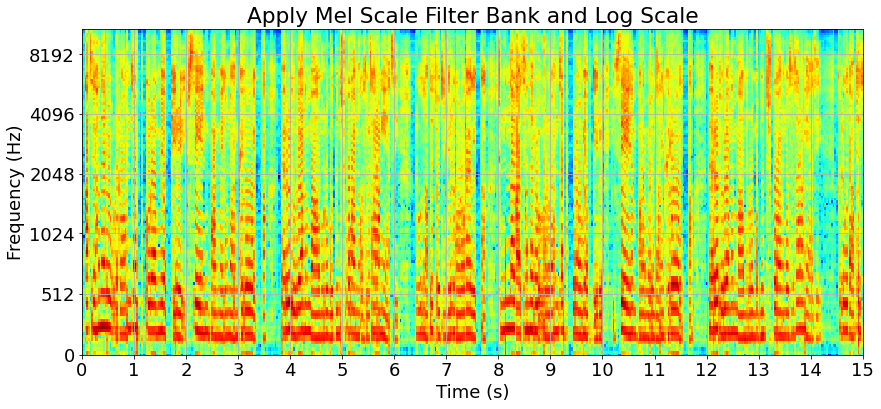

In [312]:
mel_spec_test = 20 * np.log10(np.maximum(mel_S, 1e-5))

plt.figure(figsize=(14, 6))
librosa.display.specshow(mel_spec_test, sr=sr, hop_length=hop_length, x_axis='s',y_axis='mel', cmap=cm.jet)
plt.grid('on')
plt.title("Apply Mel Scale Filter Bank and Log Scale")
plt.ylabel('Frequency (Hz)')

plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)
plt.show()

## Discrete Cosine Transform
  
  
-  MFCC Feature 추출 법은 DCT 적용 후에 처음 12개의 계수만 사용하는 데,  
DCT는 linear operation이기도 하고, 딥러닝에서는 12개 이외의 정보도 잘 사용될 여지가 있기 때문에  
딥러닝에서는 이 마지막 과정을 생략할 수도 있다.



-   이전 단계에서 계산 된 필터 뱅크 계수는 서로 밀접한 관련이 있으며, 이는 일부 딥러닝 알고리즘에서 문제가 될 수 있다. 따라서 DCT를 적용하여 필터 뱅크 계수를 장식하고 필터 뱅크의 압축 된 표현을 얻는다. 일반적으로 ASR (Automatic Speech Recognition)의 경우 결과로 생성 된 cepstral 계수 2-13이 유지되고 나머지는 버려진다. 다른 계수를 삭제하는 이유는 필터 뱅크 계수의 빠른 변화를 나타내며 나머지 계수는 ASR에 영향을 미치지 않기 때문이다.

Source : https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html


(469, 12)


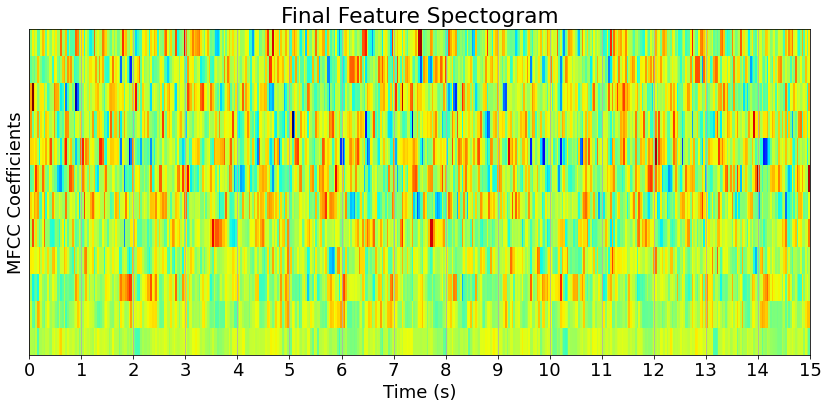

In [313]:
num_ceps = 12
cep_lifter = 22


# Keep 2-13
mfcc = dct(mel_spec_test.T, type=2 ,axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] 
(nframes, ncoeff) = mfcc.shape
print(mfcc.shape)

n = np.arange(ncoeff)


# to de-emphasize higher MFCCs (for Noise)
lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
mfcc_lifted = mfcc * lift  
mfcc_normalized = mfcc_lifted -(np.mean(mfcc_lifted, axis=0) + 1e-8)

plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.title("Final Feature Spectogram")
librosa.display.specshow(mfcc_normalized.T, sr=sr, hop_length=hop_length, x_axis='s', cmap=cm.jet)
# plt.colorbar()
plt.grid('on')
plt.ylabel('MFCC Coefficients')
plt.xticks(np.arange(0, int(len(y)/sr)+1, step=1), ["{:d}".format(x) for x in np.arange(0, int(len(y)/sr)+1, step=1)], 
           fontsize=18)

plt.show()

MFCC의 최종 출력은 위와 같다. x축은 time이고, y축은 단위가 없는 coefficients 이다.

### Feature Save to NPY File, TXT File

In [314]:
feature_save_path = "./feature/"+str(user_list[selUserNum]+"/")


if not os.path.exists(feature_save_path):
    os.makedirs(feature_save_path)
    feature_result_name = str(user_list[selUserNum]) +"_"+str(0)
else :
    feature_files = os.listdir(feature_save_path)
    feature_files = [file for file in feature_files if file.endswith(".npy")]
    feature_result_name = str(user_list[selUserNum]) +"_"+str(len(feature_files))
        
f= open(feature_save_path + feature_result_name+".txt", "w")

feature_description = "sr=%d\n" % sr
feature_description += "hop_length=%d\n" % hop_length
feature_description += "n_fft=%d\n" % n_fft
feature_description += "n_mels=%d\n" % n_mels
feature_description += "time=%d\n" % int(len(y)/sr)

f.write(feature_description)
f.close()

print(feature_result_name + "' File Write Finish !")
np.save(feature_save_path + feature_result_name, mfcc_normalized) # x_save.npy
print(" Saved File Name : "+feature_result_name)

kimsubin_0' File Write Finish !
 Saved File Name : kimsubin_0


### Load Feature 


In [323]:


user_feature_list = os.listdir("./feature/")
user_feature_list.sort()

print("User List :")
for i, item in zip(range(len(user_feature_list)), user_feature_list):
    print('[{:d}] '.format(i)+item)

selUserNum_forFeature = int(input("\n유저 번호를 선택하세요 : "))

feature_to_file_list = os.listdir("./feature/" + str(user_feature_list[selUserNum_forFeature]+"/"))
feature_npy_file_list = [file for file in feature_to_file_list if file.endswith(".npy")]
feature_npy_file_list.sort()

print("\nFile List : ")
for i, item in zip(range(len(feature_npy_file_list)), feature_npy_file_list):
    print('[{:d}] '.format(i)+item)
    
selFileNum_forFeature = int(input("\n파일 번호를 선택하세요 : "))

final_feat_name = "./feature/" + str(user_feature_list[selUserNum_forFeature]) +"/"+ str(feature_npy_file_list[selFileNum_forFeature])
feature_load = np.load(final_feat_name)

feature_txt_file_list = [file for file in feature_to_file_list if file.endswith(".txt")]
feat_descriptions = "./feature/" + str(user_feature_list[selUserNum_forFeature]) +"/"+ str(feature_txt_file_list[selFileNum_forFeature])

print(feat_descriptions+" 파일을 불러옵니다. \n")
f_d = open(feat_descriptions, 'r')
line = f_d.readline()
loaded_sr = int(line.split('=')[1].rstrip('\n'))
line = f_d.readline()
loaded_hop_length =int(line.split('=')[1].rstrip('\n'))
line = f_d.readline()
loaded_n_fft = int(line.split('=')[1].rstrip('\n'))
line = f_d.readline()
loaded_n_mels = int(line.split('=')[1].rstrip('\n'))
line = f_d.readline()
loaded_time = int(line.split('=')[1].rstrip('\n'))

print(loaded_sr, loaded_hop_length, loaded_n_fft, loaded_n_mels, loaded_time)


User List :
[0] juheon
[1] kimsubin

유저 번호를 선택하세요 : 1

File List : 
[0] kimsubin_0.npy

파일 번호를 선택하세요 : 0
./feature/kimsubin/kimsubin_0.txt 파일을 불러옵니다. 

16000 512 512 128 15


### Visualize Loaded Feature

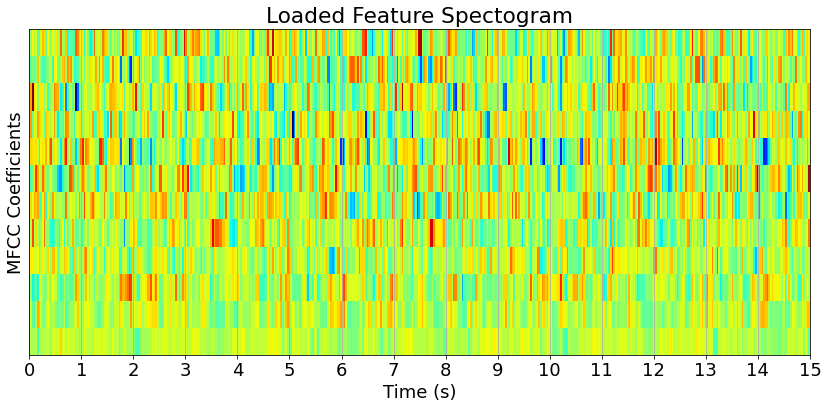

In [321]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.title("Loaded Feature Spectogram")
librosa.display.specshow(feature_load.T, sr=loaded_sr, hop_length=loaded_hop_length, x_axis='s', cmap=cm.jet)
# plt.colorbar()
plt.grid('on')
plt.ylabel('MFCC Coefficients')
plt.xticks(np.arange(0, loaded_time+1, step=1), ["{:d}".format(x) for x in np.arange(0, loaded_time+1, step=1)], 
           fontsize=18)

plt.show()

## Filter Banks vs MFCCs


To this point, the steps to compute filter banks and MFCCs were discussed in terms of their motivations and implementations. It is interesting to note that all steps needed to compute filter banks were motivated by the nature of the speech signal and the human perception of such signals. On the contrary, the extra steps needed to compute MFCCs were motivated by the limitation of some machine learning algorithms. The Discrete Cosine Transform (DCT) was needed to decorrelate filter bank coefficients, a process also referred to as whitening. In particular, MFCCs were very popular when Gaussian Mixture Models - Hidden Markov Models (GMMs-HMMs) were very popular and together, MFCCs and GMMs-HMMs co-evolved to be the standard way of doing Automatic Speech Recognition (ASR)2. With the advent of Deep Learning in speech systems, one might question if MFCCs are still the right choice given that deep neural networks are less susceptible to highly correlated input and therefore the Discrete Cosine Transform (DCT) is no longer a necessary step. It is beneficial to note that Discrete Cosine Transform (DCT) is a linear transformation, and therefore undesirable as it discards some information in speech signals which are highly non-linear.

It is sensible to question if the Fourier Transform is a necessary operation. Given that the Fourier Transform itself is also a linear operation, it might be beneficial to ignore it and attempt to learn directly from the signal in the time domain. Indeed, some recent work has already attempted this and positive results were reported. However, the Fourier transform operation is a difficult operation to learn and may arguably increase the amount of data and model complexity needed to achieve the same performance. Moreover, in doing Short-Time Fourier Transform (STFT), we’ve assumed the signal to be stationary within this short time and therefore the linearity of the Fourier transform would not pose a critical problem.